# Introduction

The original dataset have 3406 features (wavenumber), in which all features are not important and hence, feature selection is used to reduce the features. This code file is for feature selection.

## Loading Libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import StratifiedShuffleSplit, cross_val_predict
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.feature_selection import RFECV
from sklearn.metrics import mean_squared_error, roc_curve, auc, roc_auc_score

In [ ]:
plt.rcParams['font.family'] = 'Times New Roman'

## Loading Dataset

To run other dataset: Just change Dataset P1, P2, ..., OFE, PFE.

In [ ]:
filename='Dataset O.xlsx'
df=pd.read_excel(filename, index_col=0)
df.head()

,499.24539,501.23394,501.2999,503.28818,503.35441,505.34242,505.40892,507.39666,507.46343,509.45089,...,3989.32917,3989.85414,3991.38341,3991.90864,3993.43765,3993.96315,3995.49188,3996.01766,3997.54612,Target
0,0.285685,0.28567,0.299095,0.31252,0.322775,0.33303,0.325970,0.31891,0.306360,0.29381,...,0.00614,0.006050,0.00596,0.005930,0.00590,0.005950,0.00600,0.006115,0.00623,0.0
1,0.310230,0.30089,0.310420,0.31995,0.326085,0.33222,0.322500,0.31278,0.301910,0.29104,...,0.00665,0.006585,0.00652,0.006555,0.00659,0.006650,0.00671,0.006700,0.00669,0.0
2,0.353515,0.34502,0.344660,0.34430,0.343595,0.34289,0.340165,0.33744,0.333335,0.32923,...,0.00153,0.001465,0.00140,0.001395,0.00139,0.001445,0.00150,0.001565,0.00163,0.0
3,0.244705,0.22002,0.215490,0.21096,0.228045,0.24513,0.260150,0.27517,0.281050,0.28693,...,0.00188,0.001765,0.00165,0.001590,0.00153,0.001585,0.00164,0.001755,0.00187,0.0
4,0.385975,0.39838,0.384900,0.37142,0.358035,0.34465,0.328860,0.31307,0.302525,0.29198,...,0.00014,0.000185,0.00023,0.000230,0.00023,0.000180,0.00013,0.000090,0.00005,0.0


In [ ]:
X, Y = df.iloc[:, :-1], df.iloc[:, -1]

In [ ]:
stratified_split = StratifiedShuffleSplit(n_splits=1, test_size=0.20, random_state=42)
for train_index, test_index in stratified_split.split(X, Y):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    Y_train, Y_test = Y.iloc[train_index], Y.iloc[test_index]

print('X_train: {}     Y_train: {} \nX_test: {}     Y_test: {}'.format(X_train.shape, Y_train.shape, X_test.shape, Y_test.shape))

X_train: (143, 3406)     Y_train: (143,) 
X_test: (36, 3406)     Y_test: (36,)


## Feature Selection

### 1. Recursive Feature Elimination

Recursive Feature Elimination (RFE) is a feature selection method used in machine learning to identify the most important features for a predictive model. It works by recursively removing the least important features and building a model on the remaining ones until a specified number of features is reached or performance criteria are met.

In [ ]:
estimator = LinearRegression()
rfecv = RFECV(estimator, step=1, cv=10, scoring='neg_mean_squared_error')
rfecv.fit(X_train, Y_train)

optimal_n_features = rfecv.n_features_
selected_features_rfecv = np.array(X.columns)[rfecv.support_]

In [ ]:
X_train_rfecv = rfecv.transform(X_train)
X_test_rfecv = rfecv.transform(X_test)

In [ ]:
# Fit the estimator (LinearRegression) with selected features
estimator.fit(X_train_rfecv, Y_train)

# Get the coefficients after fitting the model
coefficients = estimator.coef_

# Now you can print the coefficients for selected features
for feature, coef in zip(selected_features_rfecv, coefficients):
    print(f'Correlation Coefficient for {feature}: {coef}')

Correlation Coefficient for 1035.33569: 10.167456400876706
Correlation Coefficient for 1109.43421: 9.567626111097391
Correlation Coefficient for 1111.48872: -20.18197720532581
Correlation Coefficient for 1134.0883: -68.55507093171217
Correlation Coefficient for 1138.04756: 428.51969168428786
Correlation Coefficient for 1138.19732: -490.8989013937067
Correlation Coefficient for 1142.15603: 116.73775416998281
Correlation Coefficient for 1208.05058: -130.37188451073536
Correlation Coefficient for 1209.94587: 733.3356332230002
Correlation Coefficient for 1210.10509: -594.4149443472983
Correlation Coefficient for 3260.50387: -160.8621853951644
Correlation Coefficient for 3262.12911: 123.24484658214806
Correlation Coefficient for 3404.31941: 272.25356329343435
Correlation Coefficient for 3405.92573: -231.14830718628534


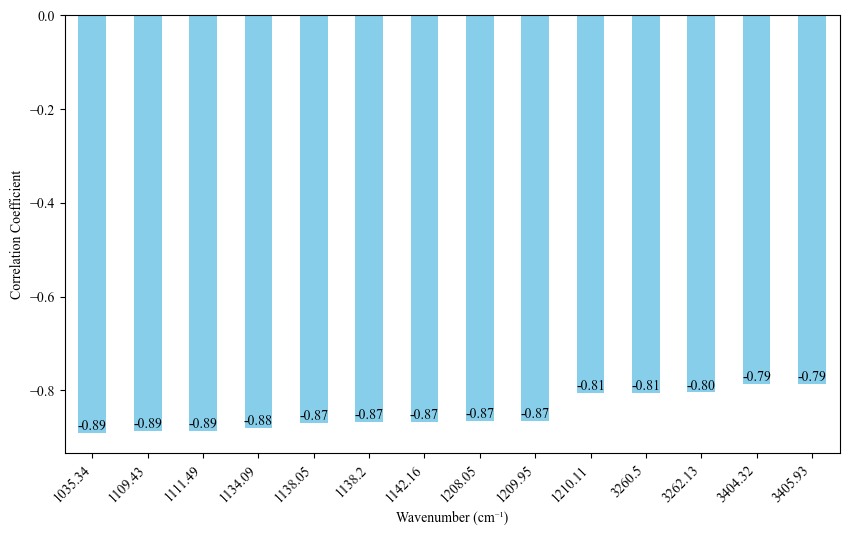

In [ ]:
# Concatenate selected features with the target variable
selected_features_with_target = selected_features_rfecv.tolist() + [df.columns[-1]]

# Calculate the correlation coefficients between selected features and the target variable
correlation_with_target = df[selected_features_with_target].corr().iloc[:-1, -1]

selected_features_rfecv_int =[round(value, 2) for value in selected_features_rfecv]

# Plot the correlation coefficients
plt.figure(figsize=(10, 6))
bars = correlation_with_target.sort_values().plot(kind='bar', color='skyblue')
#plt.title('Correlation of Selected Features with Target Variable')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Correlation Coefficient')
plt.xticks(range(len(selected_features_rfecv_int)), selected_features_rfecv_int, rotation=45, ha='right')

# Annotate each bar with its corresponding correlation coefficient
for i, val in enumerate(correlation_with_target.sort_values()):
    bars.text(i, val, f'{val:.2f}', ha='center', va='bottom')

# Adjust subplot parameters to give some space at the bottom
plt.subplots_adjust(bottom=0.15)

# Save the figure with 600 DPI as a JPEG image
plt.savefig('F9.jpg', dpi=600, format='jpg')

plt.show()

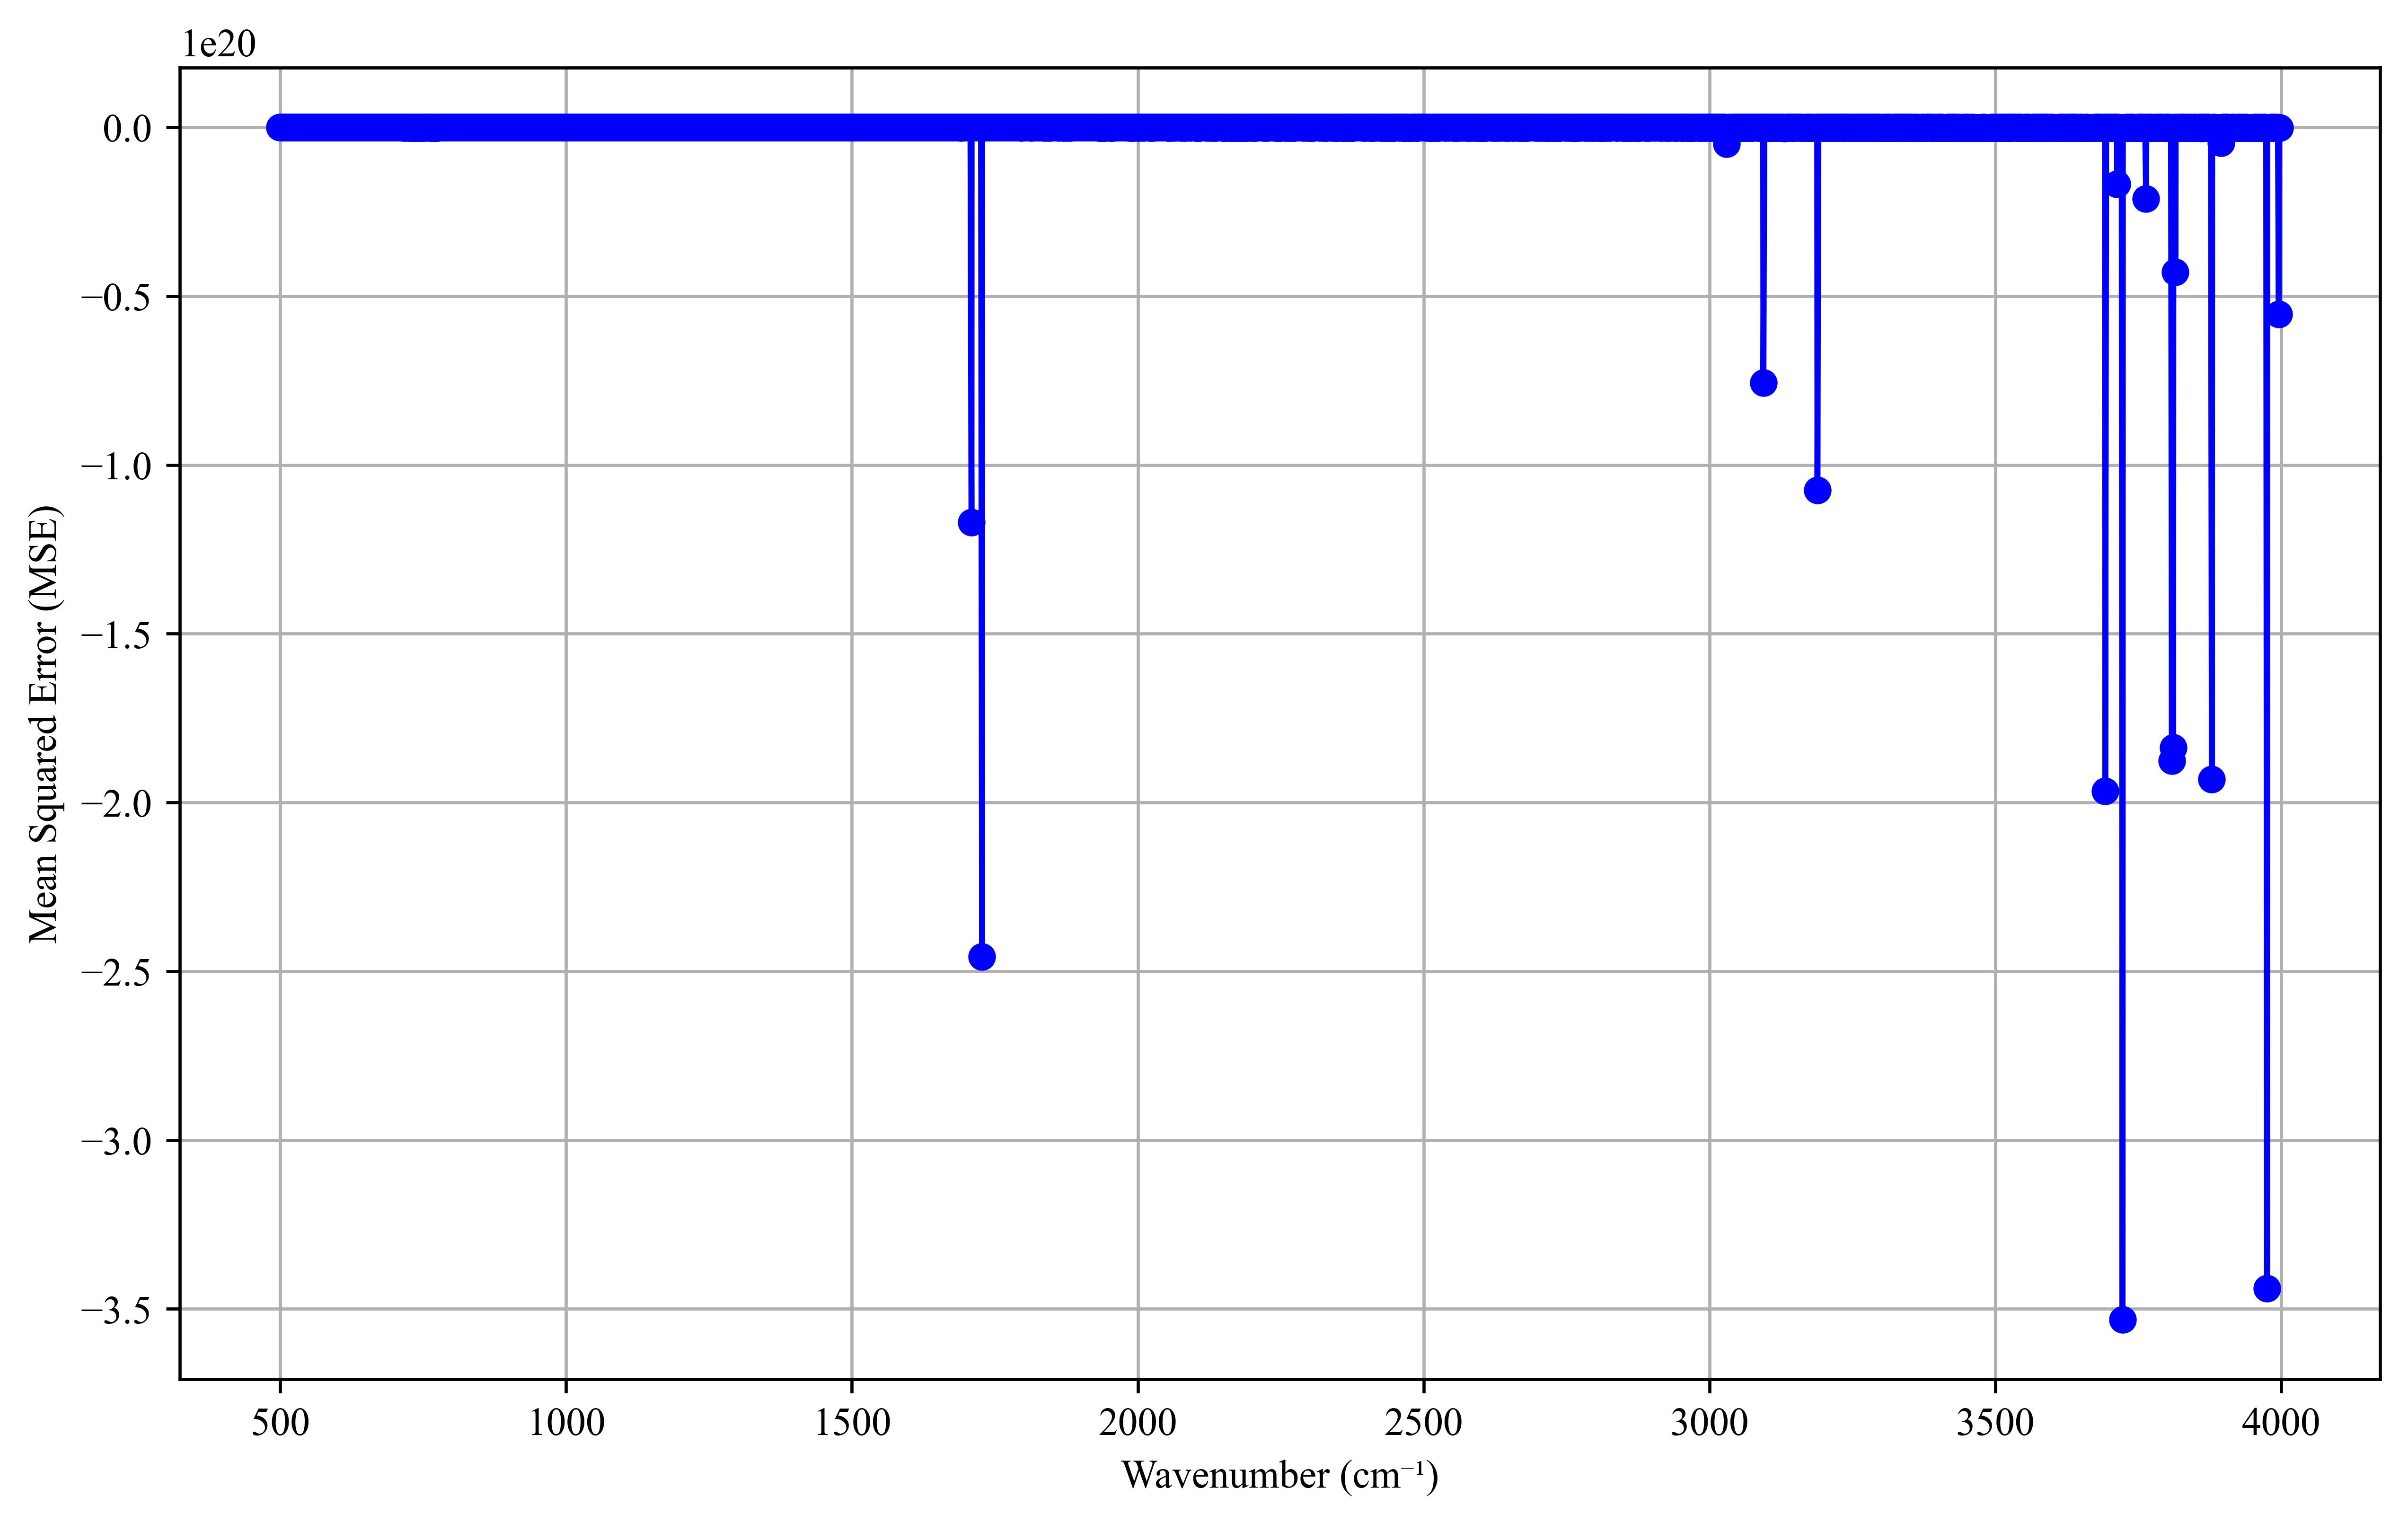

In [ ]:
plt.figure(figsize=(10, 6), dpi=600)
plt.plot(X.columns, rfecv.cv_results_['mean_test_score'], marker='o', linestyle='-', color='b')
#plt.title('MSE vs Number of Selected Features (RFECV)')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)

# Save the figure with 600 DPI as a JPEG image
plt.savefig('F10.jpg', dpi=600, format='jpg')

plt.show()

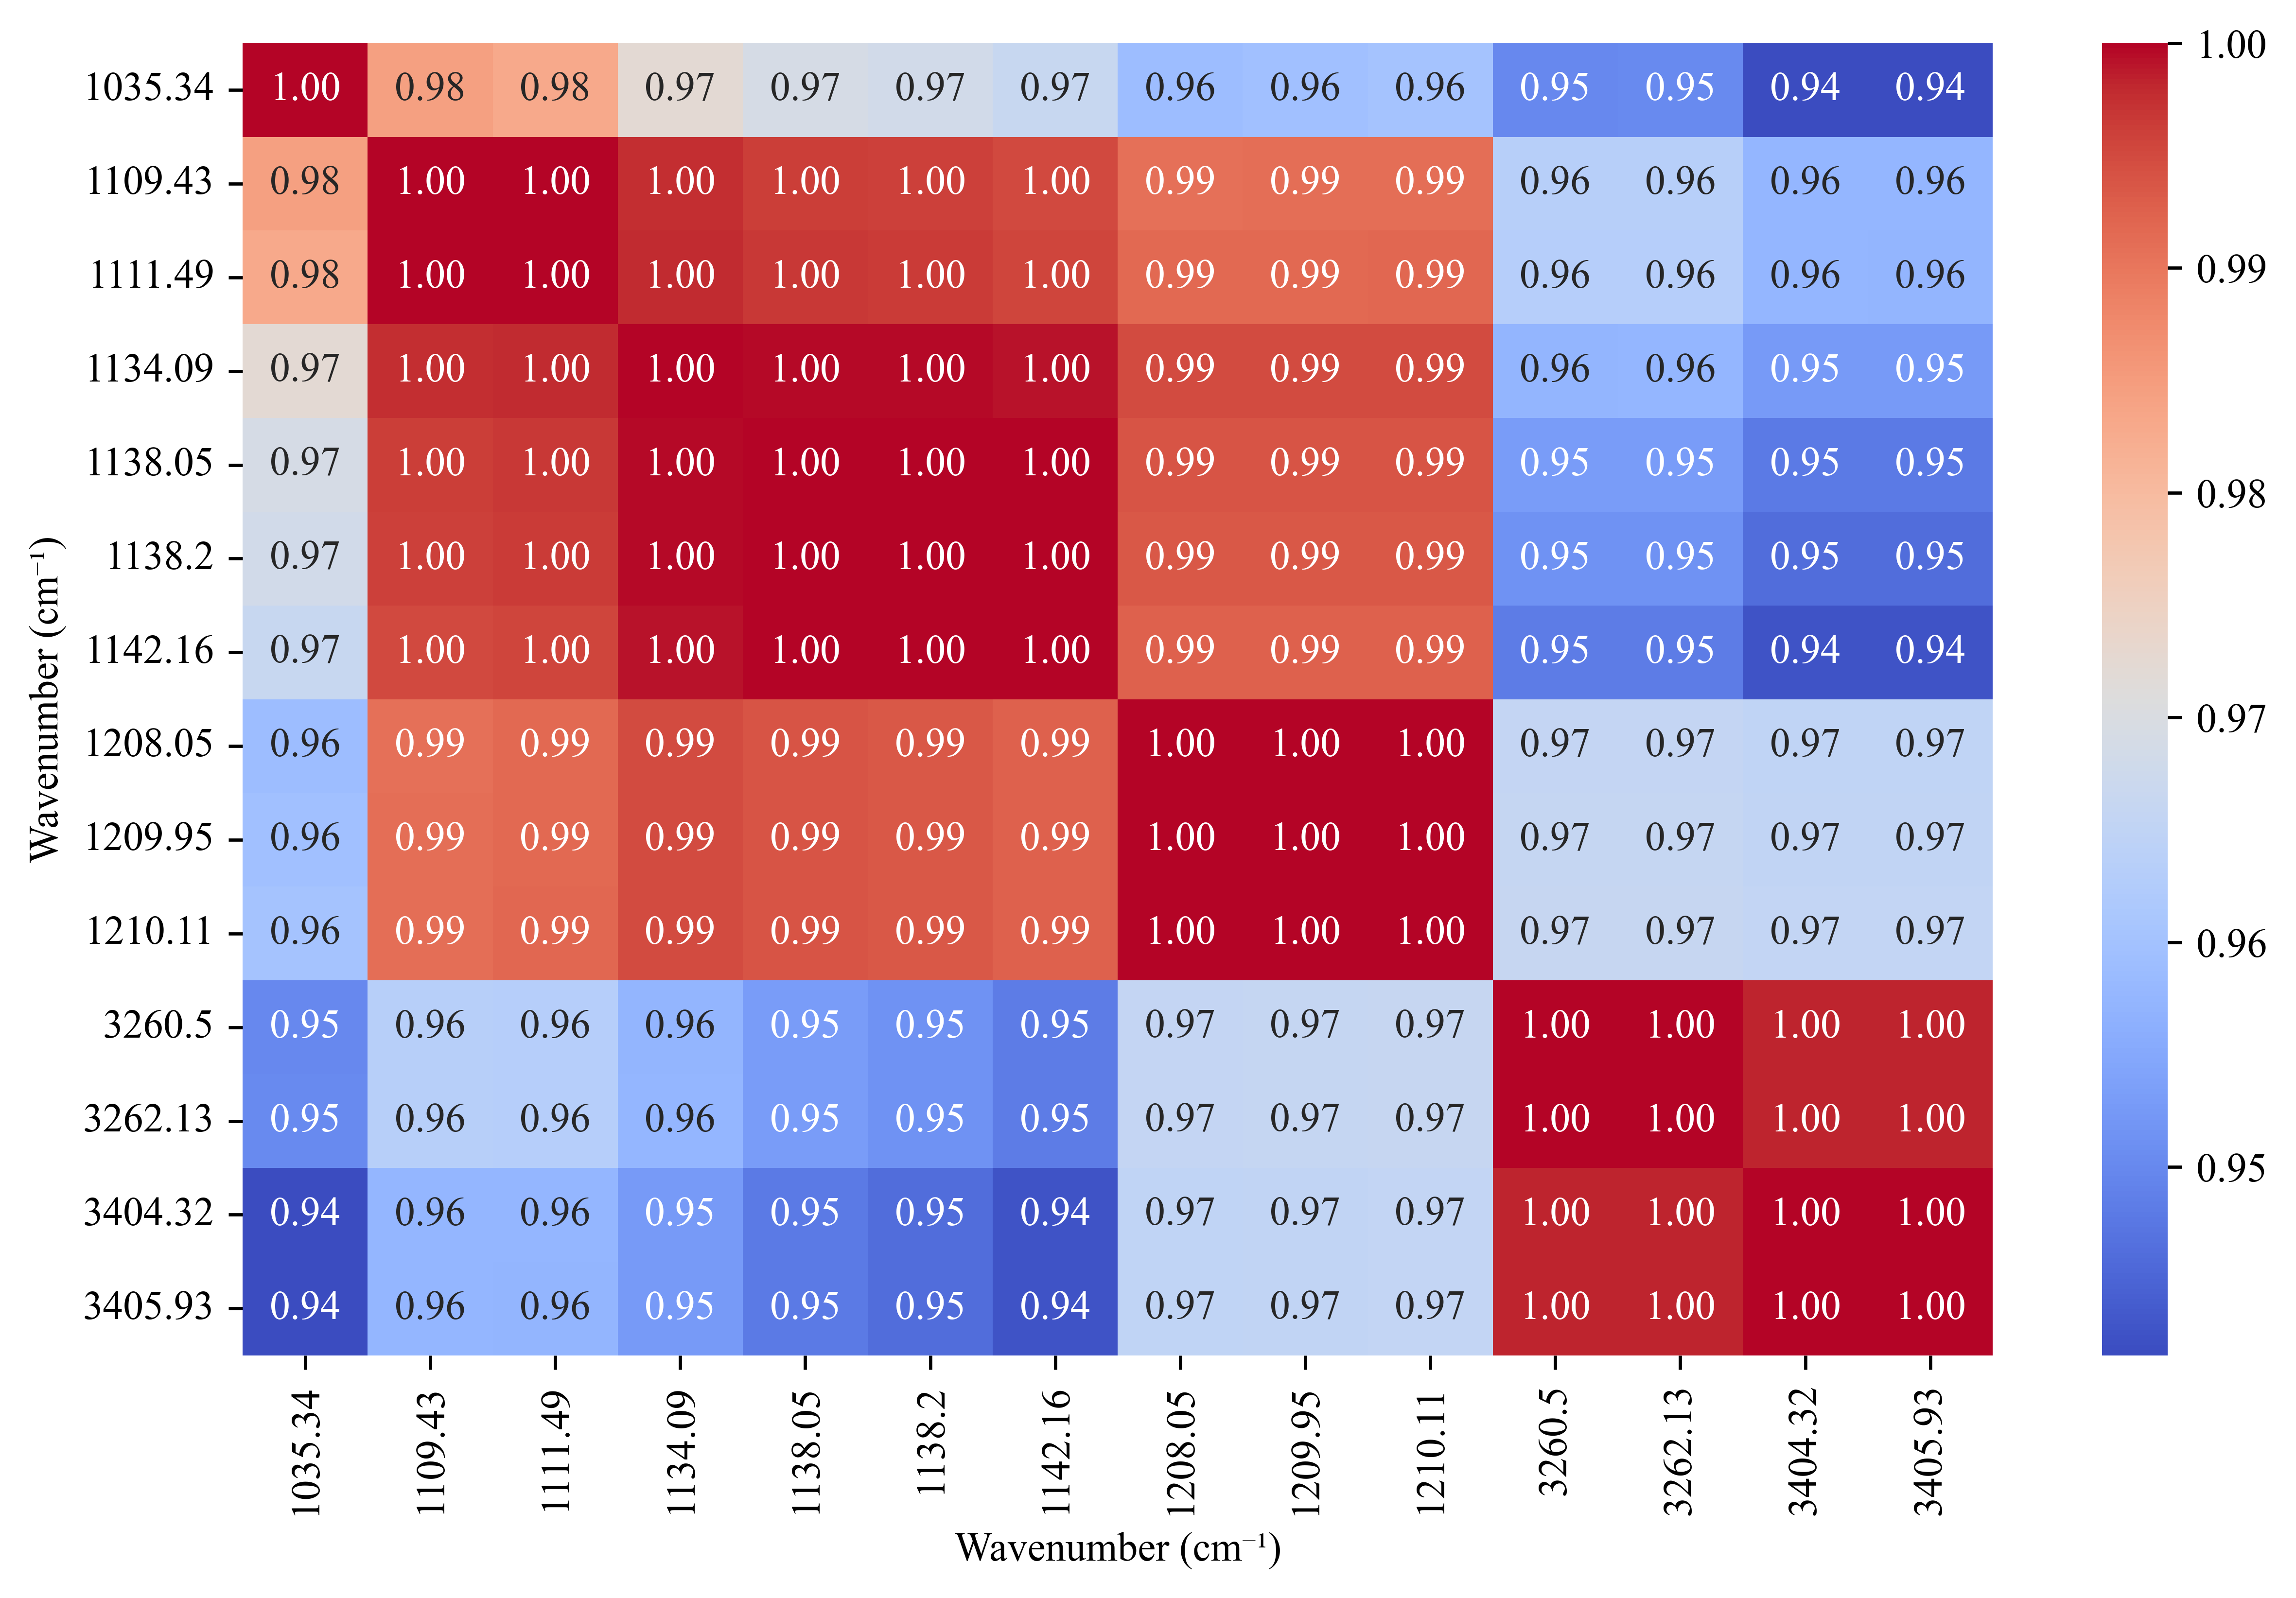

In [ ]:
# Calculate the correlation matrix for selected features (RFECV)
correlation_matrix_rfecv = pd.DataFrame(X_train_rfecv, columns=selected_features_rfecv).corr()

# Convert column and index labels to integers
correlation_matrix_rfecv.columns = [round(value, 2) for value in correlation_matrix_rfecv.columns]
correlation_matrix_rfecv.index = [round(value, 2) for value in correlation_matrix_rfecv.index]

# Plotting Correlation Heatmap for Selected Features (RFECV)
plt.figure(figsize=(10, 6), dpi=600)
sns.heatmap(correlation_matrix_rfecv, annot=True, cmap='coolwarm', fmt=".2f")
#plt.title('Correlation Heatmap for Selected Features (RFECV)')
plt.xlabel('Wavenumber (cm⁻¹)')
plt.ylabel('Wavenumber (cm⁻¹)')
plt.tight_layout()

# Adjust layout to provide space for labels
plt.subplots_adjust(left=0.15, right=0.9, bottom=0.15, top=0.9)

# Save the figure with 600 DPI as a JPEG image
plt.savefig('F11.jpg', dpi=600, format='jpg')

plt.show()

In [ ]:
# Create a new DataFrame with selected features and target variable
selected_df = df[selected_features_with_target]

# Store the new DataFrame in an Excel file
selected_filename = 'Dataset PFS.xlsx'
selected_df.to_excel(selected_filename)

print(f'New DataFrame with selected features and target variable has been saved to {selected_filename}.')

New DataFrame with selected features and target variable has been saved to Dataset PFS.xlsx.


### 2. Random Forest Importance (RFI)

Random Forest Importance (RFI), also known as Feature Importance in the context of Random Forest models, is a technique used to evaluate the relative importance of features in a dataset for predicting the target variable.

In [ ]:
rf_model = RandomForestRegressor()
rf_model.fit(X_train, Y_train)

RandomForestRegressor()

In [ ]:
# Get feature importances
feature_importances_rfi = rf_model.feature_importances_

In [ ]:
# Sort indices based on importance
sorted_indices_rfi = np.argsort(feature_importances_rfi)[::-1]

In [ ]:
# Select the top features
top_features_rfi = X.columns[sorted_indices_rfi][:optimal_n_features]

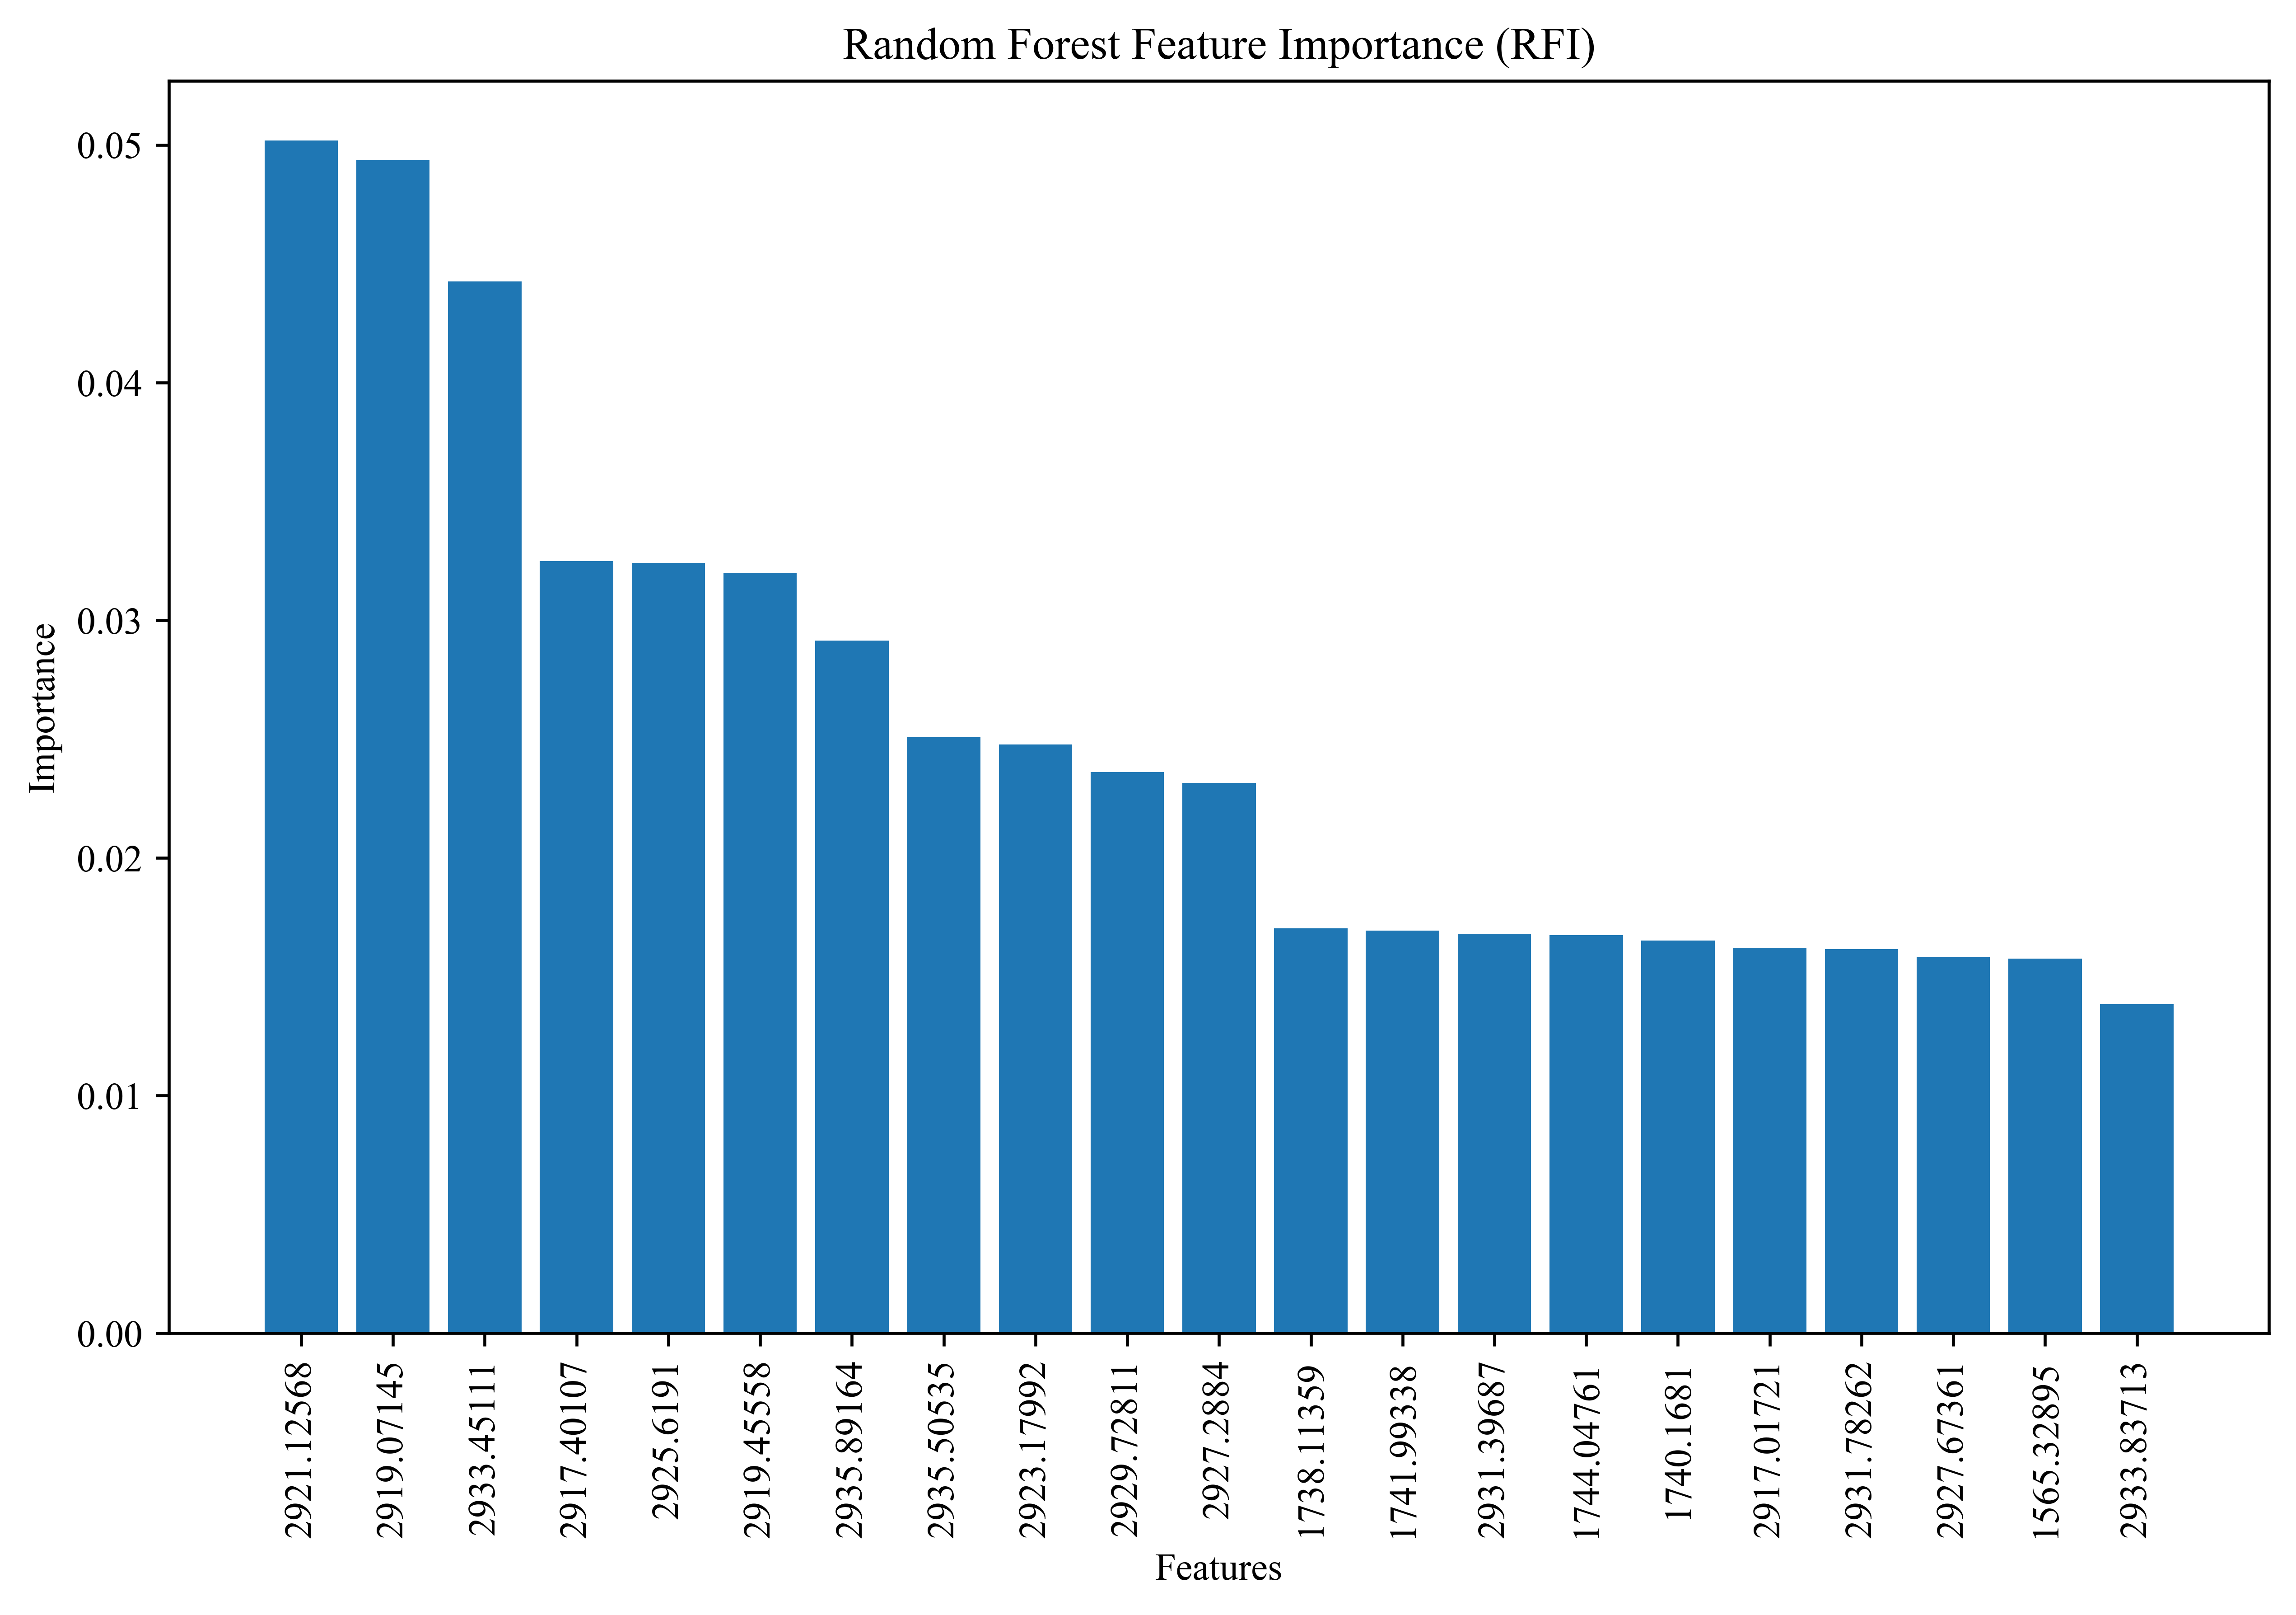

In [ ]:
# Plotting Feature Importance (RFI)
plt.figure(figsize=(10, 6), dpi=600)
plt.bar(range(len(top_features_rfi)), feature_importances_rfi[sorted_indices_rfi][:optimal_n_features], align='center')
plt.xticks(range(len(top_features_rfi)), top_features_rfi, rotation='vertical')
plt.title('Random Forest Feature Importance (RFI)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()


In [ ]:
# Update the selected features with Random Forest importance
selected_features_rfi = top_features_rfi

In [ ]:
# Print and use selected features
print('Selected Features (RFECV):', selected_features_rfecv)
print('Selected Features (RFI):', selected_features_rfi)

Selected Features (RFECV): [1109.28823 1109.43421 1115.45095 1115.59773 1117.50518 1142.30633
 1146.26451 1146.41535 1148.31875 1148.46986 1172.9696 1175.02383
 1177.07807 1177.23297 1181.18655 1207.89163 1208.05058 1209.94587
 1283.89842 1284.06737 1285.95266]
Selected Features (RFI): Index([2921.12568, 2919.07145, 2933.45111, 2917.40107,  2925.6191, 2919.45558,
       2935.89164, 2935.50535, 2923.17992, 2929.72811,  2927.2884, 1738.11359,
       1741.99338, 2931.39687, 1744.04761,  1740.1681, 2917.01721, 2931.78262,
       2927.67361, 1565.32895, 2933.83713],
      dtype='object')


In [ ]:
# Use selected features for modeling

# Continue with your Linear Regression modeling and evaluation steps...
model_rfecv = LinearRegression()
model_rfecv.fit(X_train_rfecv, Y_train)

LinearRegression()

In [ ]:
y_pred_rfecv = model_rfecv.predict(X_test_rfecv)
mse_test_rfecv = mean_squared_error(Y_test, y_pred_rfecv)
print(f'Mean Squared Error on Test Set (RFECV): {mse_test_rfecv}')

Mean Squared Error on Test Set (RFECV): 0.009531224125051134


In [ ]:
# Continue with your Random Forest modeling and evaluation steps...
model_rfi = RandomForestRegressor()
model_rfi.fit(X_train, Y_train)


RandomForestRegressor()

In [ ]:
y_pred_rfi = model_rfi.predict(X_test)
mse_test_rfi = mean_squared_error(Y_test, y_pred_rfi)
print(f'Mean Squared Error on Test Set (RFI): {mse_test_rfi}')

Mean Squared Error on Test Set (RFI): 0.0044106616964964705


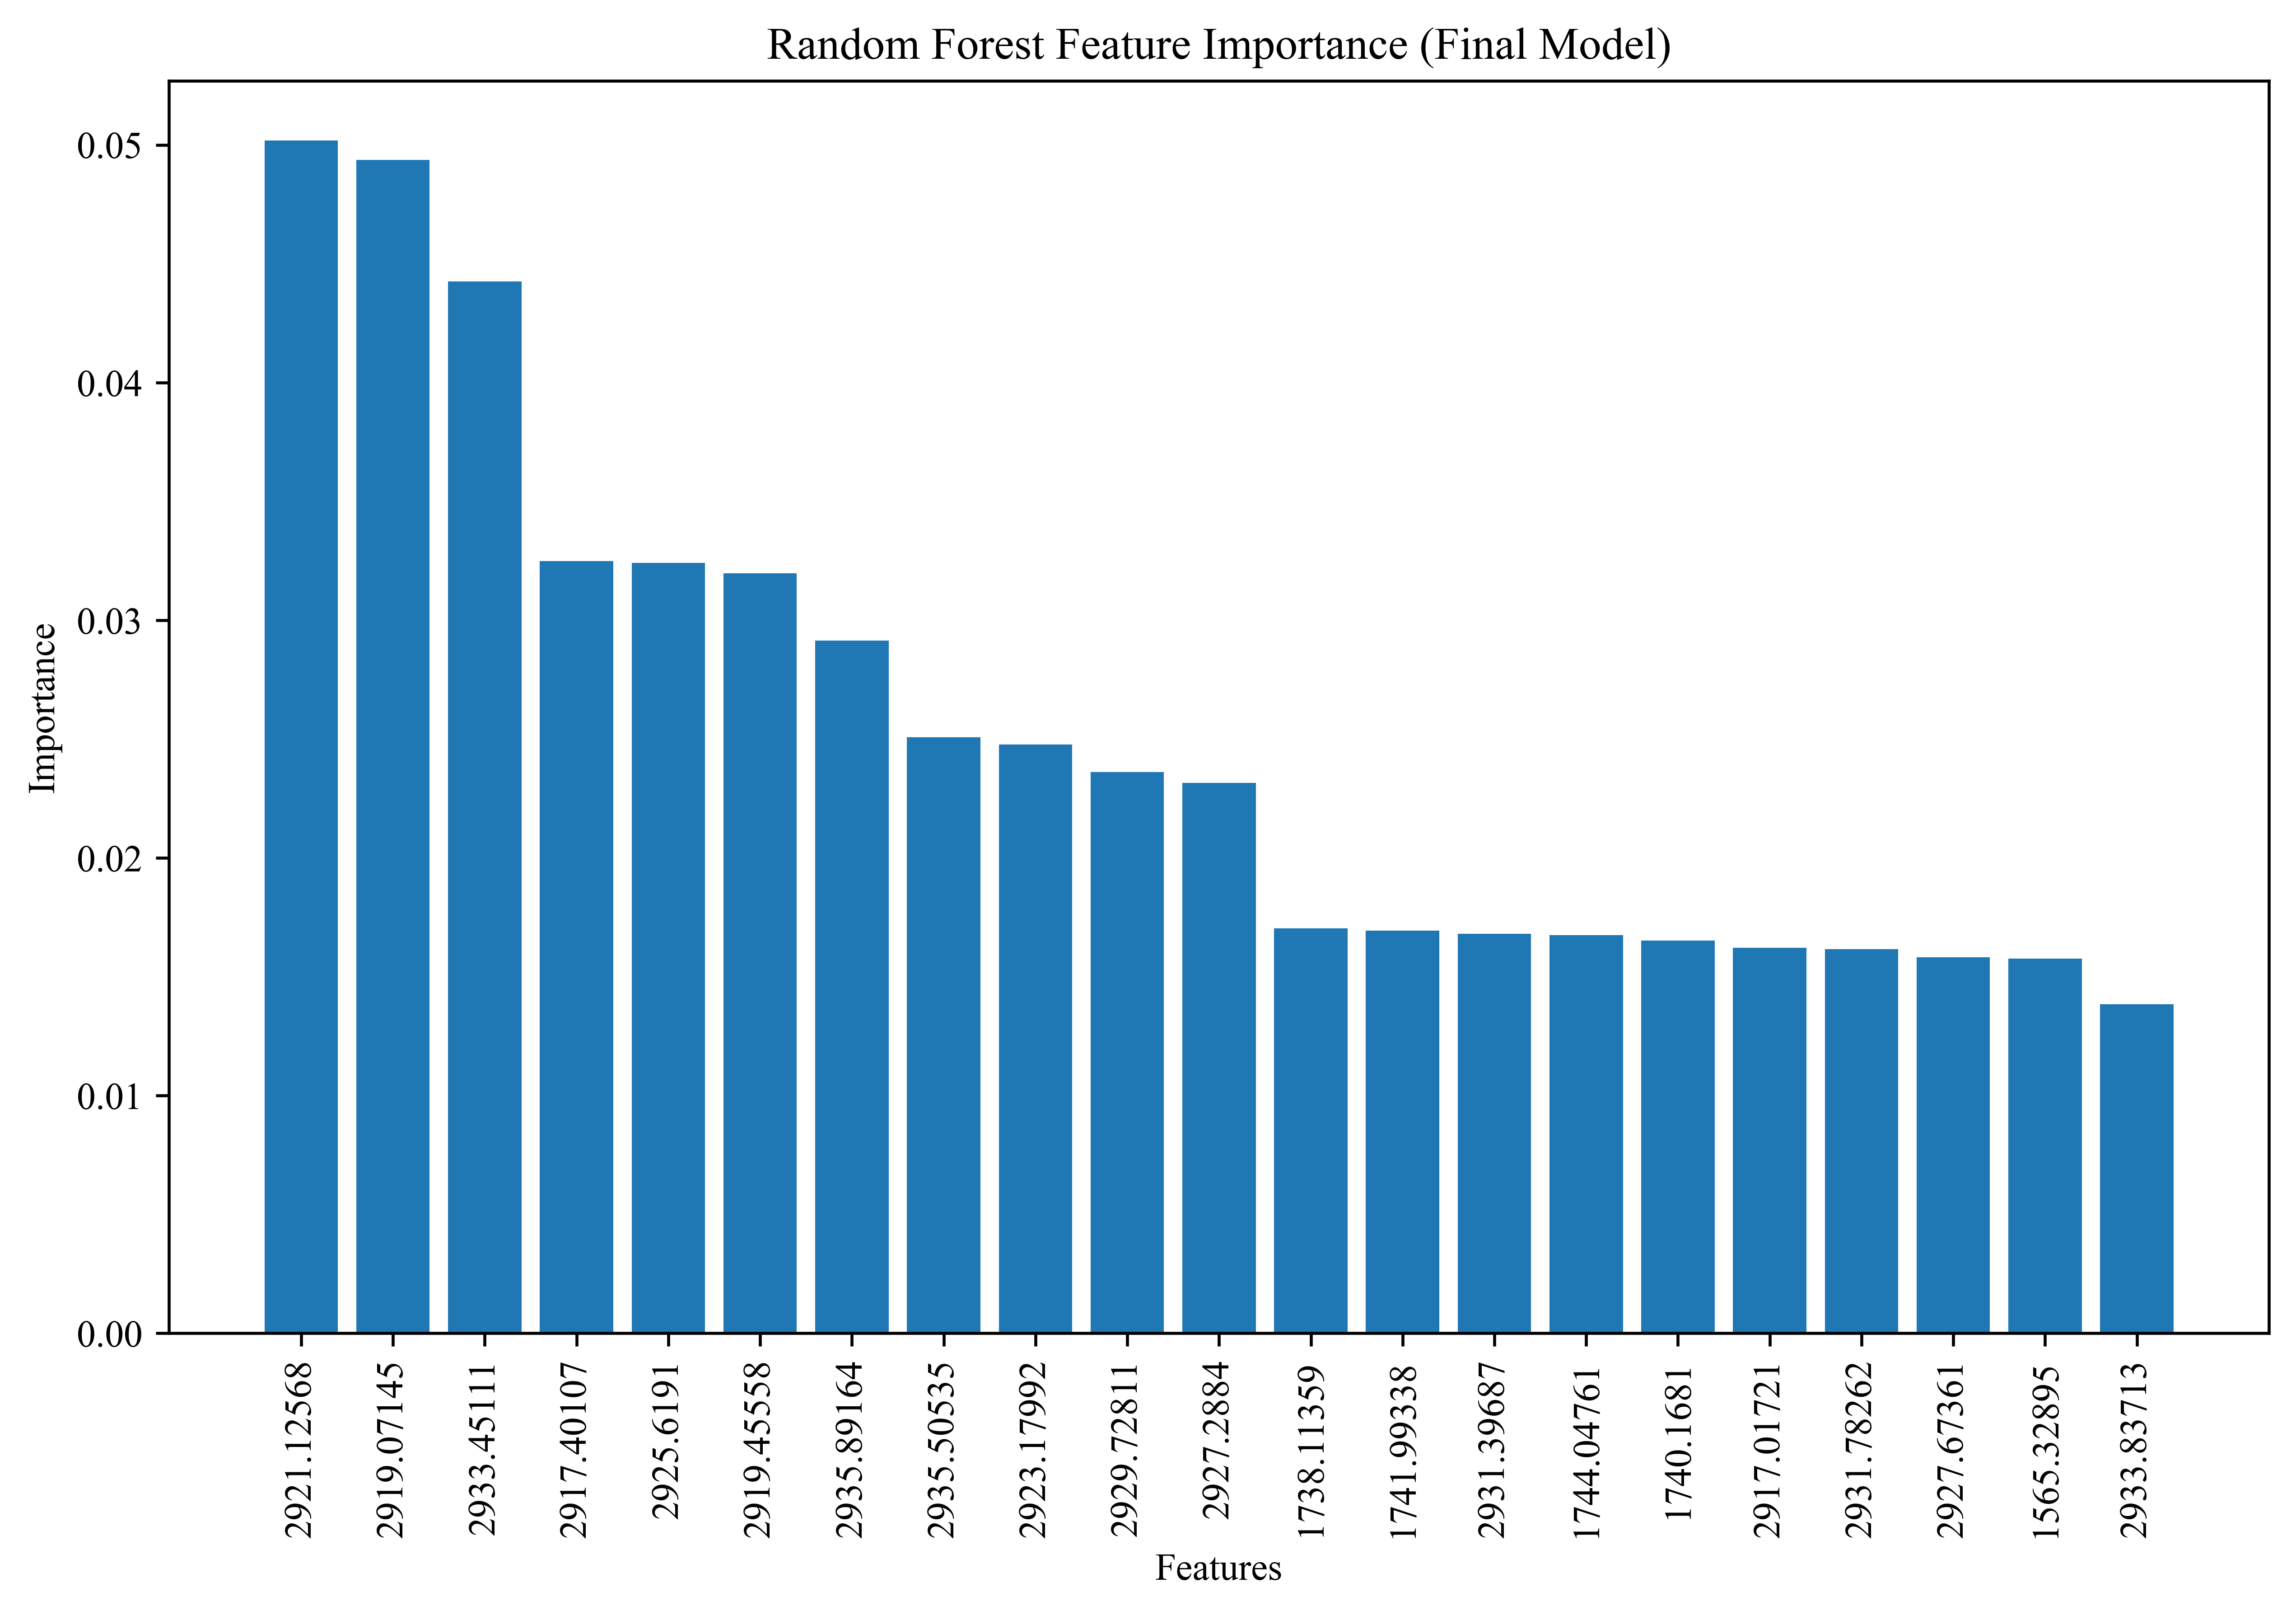

In [ ]:
# Additional evaluation or visualization steps can be added based on your requirements.

# 2. Feature Importance Plot for Random Forest Model (Final Model)
plt.figure(figsize=(10, 6), dpi=600)
plt.bar(range(len(selected_features_rfi)), feature_importances_rfi[sorted_indices_rfi][:optimal_n_features], align='center')
plt.xticks(range(len(selected_features_rfi)), selected_features_rfi, rotation='vertical')
plt.title('Random Forest Feature Importance (Final Model)')
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()